# MOT16: A Benchmark for Multi-Object Tracking

Original paper: https://arxiv.org/pdf/1603.00831.pdf

## Annotation Rules

* **Targets**: All upgright people including
    * walking, standing, running pedestrains
    * cyclists, skaters
    
    
* **Distractors**: Static people or representations
    * people not int upgright position (sitting, lying down)
    * reflections, drawings or photographs of people
    * human-like objects like dolls, manneqins


* **Others**: Moving vehicles and occluders
    * Cars, bikes, motorbikes
    * Pillars trees, building

In [1]:
%matplotlib inline

import sys
sys.path.insert(0,'../')
#from pak import datasets
from pak.datasets.MOT import MOT16
from pak import utils
import matplotlib.pyplot as plt

root = '/home/julian/Data/pak_test1'

frame = 1

mot16 = MOT16(root)
print("FOLDER:", mot16.get_test_imgfolder("MOT16-02"))

# the training set contains both detection as well as ground-truth data
# while the test set only contains detection data.
X, Y_det, Y_gt = mot16.get_train("MOT16-02", memmapped=True)

/home/julian/Data/pak_test1/MOT16 found :)
FOLDER: /home/julian/Data/pak_test1/MOT16/train/MOT16-02/img1
MOT16: load memmapped file /home/julian/Data/pak_test1/MOT16/train/MOT16-02/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded


### sub-datasets

#### Training:

In [2]:
for f in mot16.get_train_folders():
    print(f)

MOT16-02
MOT16-04
MOT16-05
MOT16-09
MOT16-10
MOT16-11
MOT16-13


#### Test:

In [3]:
for f in mot16.get_test_folders():
    print(f)

MOT16-01
MOT16-03
MOT16-06
MOT16-07
MOT16-08
MOT16-12
MOT16-14


### Y-detection 

| Position  | Name | Description |
| ------------- | ------------- | ---------- |
| 0  | Frame number  | Indicates at which frame the object is present  |
| 2  | Bounding box left  | Coors of top-left corner of pedestrian bb |
| 3  | Bounding box top  | Coors of top-left corner of pedestrian bb |
| 4  | Bounding box width  | Coors of top-left corner of pedestrian bb |
| 5  | Bounding box height  | Coors of top-left corner of pedestrian bb|
| 6  | Confidence score | Indicates how confident the detector is that this instance is a pedestrian |

Positions that are not described yield no function and can be ignored

### Y-ground-truth

| Position  | Name | Description |
| ------------- | ------------- | ---------- |
| 0  | Frame number  | Indicates at which frame the object is present  |
| 1  | Identity number | Each pedestrian trjaectory is identified by a unique ID |
| 2  | Bounding box left  | Coors of top-left corner of pedestrian bb |
| 3  | Bounding box top  | Coors of top-left corner of pedestrian bb |
| 4  | Bounding box width  | Coors of top-left corner of pedestrian bb |
| 5  | Bounding box height  | Coors of top-left corner of pedestrian bb|
| 6  | Confidence score | Flag wheather the entry is to be considered (1) or ignored (0) |
| 7  | Class | Indicates the type of object annotated
| 8  | Visibility | Visibility ratio, [0, 1], that says how much of that object is visible |

In [4]:
print("Y_det:\t",Y_det.shape)
print("Y_gt:\t", Y_gt.shape)

Y_det:	 (7267, 10)
Y_gt:	 (29193, 9)


### Classes

In [5]:
for i in range(13):
    print(mot16.label_id_to_class(i))

NONE
Pedestrian
Person on vehicle
Car
Bycicle
Motorbike
Non motorized vehicle
Static person
Distractor
Occluder
Occluder on the ground
Occluder full
Reflection


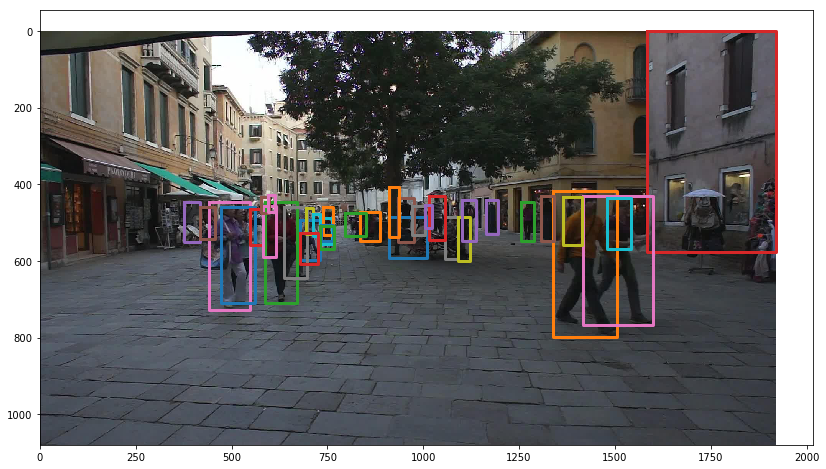

In [6]:
Y_gt_frame1 = utils.extract_eq(Y_gt, col=0, value=frame)

left = Y_gt_frame1[:,2]
top = Y_gt_frame1[:,3]
width = Y_gt_frame1[:,4]
height = Y_gt_frame1[:,5]

img = X[frame]
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111)
ax.imshow(img)

for x, y, w, h in zip(*[left, top, width, height]):
    bbX, bbY = utils.bb_to_plt_plot(x, y, w, h)
    ax.plot(bbX, bbY, linewidth=3)

plt.show()